In [1]:
#Homework_2_Kingsley_Chukwu
 using CSV # for reading in CSV files as DataFrames\n,
 using DataFrames
 using PyPlot # for plotting
 using Statistics 

In [2]:
my_auto_file = joinpath("","automobiles.csv")

"automobiles.csv"

In [3]:
df = CSV.read(my_auto_file, header =[:mpg, :cylinder, :displacement, :horsepower, :weight, :acceleration, :model_year, :origin, :car_name], copycols = true)
first(df, 10)

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64⍰,Float64,Float64,Int64
1,18.0,8,307.0,130.0,3504.0,12.0,70
2,15.0,8,350.0,165.0,3693.0,11.5,70
3,18.0,8,318.0,150.0,3436.0,11.0,70
4,16.0,8,304.0,150.0,3433.0,12.0,70
5,17.0,8,302.0,140.0,3449.0,10.5,70
6,15.0,8,429.0,198.0,4341.0,10.0,70
7,14.0,8,454.0,220.0,4354.0,9.0,70
8,14.0,8,440.0,215.0,4312.0,8.5,70
9,14.0,8,455.0,225.0,4425.0,10.0,70


In [4]:
number_of_automobiles = size(df, 1)
println("The number of automobiles are $number_of_automobiles")

The number of automobiles are 398


In [5]:
n_row_with_mis_horpower = filter(row -> row[:horsepower] === missing, df)

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64⍰,Float64,Float64,Int64
1,25.0,4,98.0,missing,2046.0,19.0,71
2,21.0,6,200.0,missing,2875.0,17.0,74
3,40.9,4,85.0,missing,1835.0,17.3,80
4,23.6,4,140.0,missing,2905.0,14.3,80
5,34.5,4,100.0,missing,2320.0,15.8,81
6,23.0,4,151.0,missing,3035.0,20.5,82


In [6]:
no_miss = size(n_row_with_mis_horpower, 1)
println("The number of automobiles missing their horsepower are $no_miss")

The number of automobiles missing their horsepower are 6


In [7]:
horsepower_col = df.horsepower
numb_mis = 0;
for h in horsepower_col
    if h === missing
        numb_mis+=1;
    end
end
println("The number of automobiles missing their horsepower are $numb_mis")

The number of automobiles missing their horsepower are 6


In [8]:
dropmissing!(df, :horsepower)

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,18.0,8,307.0,130.0,3504.0,12.0,70
2,15.0,8,350.0,165.0,3693.0,11.5,70
3,18.0,8,318.0,150.0,3436.0,11.0,70
4,16.0,8,304.0,150.0,3433.0,12.0,70
5,17.0,8,302.0,140.0,3449.0,10.5,70
6,15.0,8,429.0,198.0,4341.0,10.0,70
7,14.0,8,454.0,220.0,4354.0,9.0,70
8,14.0,8,440.0,215.0,4312.0,8.5,70
9,14.0,8,455.0,225.0,4425.0,10.0,70


In [9]:
mat = PyPlot.matplotlib.cm.get_cmap("hot")

In [33]:
auto_color = mat.(range(0.0, stop =0.9, length = 37))

37-element Array{NTuple{4,Float64},1}:
 (0.0416, 0.0, 0.0, 1.0)             
 (0.10336906432660908, 0.0, 0.0, 1.0)
 (0.1651381286532182, 0.0, 0.0, 1.0) 
 (0.2372020370342621, 0.0, 0.0, 1.0) 
 (0.2989711013608711, 0.0, 0.0, 1.0) 
 (0.37103500974191517, 0.0, 0.0, 1.0)
 (0.43280407406852417, 0.0, 0.0, 1.0)
 (0.4945731383951333, 0.0, 0.0, 1.0) 
 (0.5666370467761772, 0.0, 0.0, 1.0) 
 (0.6284061111027862, 0.0, 0.0, 1.0) 
 (0.7004700194838303, 0.0, 0.0, 1.0) 
 (0.7622390838104393, 0.0, 0.0, 1.0) 
 (0.8240081481370484, 0.0, 0.0, 1.0) 
 ⋮                                   
 (1.0, 0.6887253293507516, 0.0, 1.0) 
 (1.0, 0.7504899348656205, 0.0, 1.0) 
 (1.0, 0.8122545403804896, 0.0, 1.0) 
 (1.0, 0.8843132468145034, 0.0, 1.0) 
 (1.0, 0.9460778523293724, 0.0, 1.0) 
 (1.0, 1.0, 0.02720490955785083, 1.0)
 (1.0, 1.0, 0.1198520610285317, 1.0) 
 (1.0, 1.0, 0.21249921249921258, 1.0)
 (1.0, 1.0, 0.3205875558816736, 1.0) 
 (1.0, 1.0, 0.41323470735235446, 1.0)
 (1.0, 1.0, 0.5213230507348154, 1.0) 
 (1.0, 1.0,

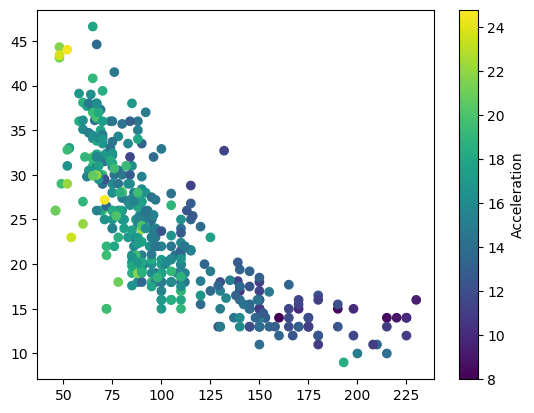

PyObject <matplotlib.colorbar.Colorbar object at 0x12ef21828>

In [11]:
figure()
#df[:,:horsepower]
scatter(df[:,:horsepower], df[:,:mpg], c=df[:,:acceleration])
char=colorbar(label="Acceleration")

In [12]:
car_witout_ford = filter(row -> occursin("ford", row[:car_name]) == false, df) 

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,18.0,8,307.0,130.0,3504.0,12.0,70
2,15.0,8,350.0,165.0,3693.0,11.5,70
3,18.0,8,318.0,150.0,3436.0,11.0,70
4,16.0,8,304.0,150.0,3433.0,12.0,70
5,14.0,8,454.0,220.0,4354.0,9.0,70
6,14.0,8,440.0,215.0,4312.0,8.5,70
7,14.0,8,455.0,225.0,4425.0,10.0,70
8,15.0,8,390.0,190.0,3850.0,8.5,70
9,15.0,8,383.0,170.0,3563.0,10.0,70


In [13]:
car_wit_ford = filter(row -> occursin("ford", row[:car_name]) == true, df) 

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,17.0,8,302.0,140.0,3449.0,10.5,70
2,15.0,8,429.0,198.0,4341.0,10.0,70
3,21.0,6,200.0,85.0,2587.0,16.0,70
4,10.0,8,360.0,215.0,4615.0,14.0,70
5,19.0,6,250.0,88.0,3302.0,15.5,71
6,14.0,8,351.0,153.0,4154.0,13.5,71
7,13.0,8,400.0,170.0,4746.0,12.0,71
8,18.0,6,250.0,88.0,3139.0,14.5,71
9,21.0,4,122.0,86.0,2226.0,16.5,72


In [14]:
#No 7 How many of them are of unique cylinder
unique_cylider_ford = unique(car_wit_ford[:, :cylinder])
le = size(unique_cylider_ford, 1)
println("The number of automobiles that have unique number of cylinder is : $le")

The number of automobiles that have unique number of cylinder is : 3


In [47]:
#No 8 
gb_cylinders = groupby(car_wit_ford, :cylinder)

,mpg,cylinder,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,17.0,8,302.0,140.0,3449.0,10.5,70
2,15.0,8,429.0,198.0,4341.0,10.0,70
3,10.0,8,360.0,215.0,4615.0,14.0,70
4,14.0,8,351.0,153.0,4154.0,13.5,71
5,13.0,8,400.0,170.0,4746.0,12.0,71
6,14.0,8,351.0,153.0,4129.0,13.0,72
7,13.0,8,302.0,140.0,4294.0,16.0,72
8,14.0,8,302.0,137.0,4042.0,14.5,73
9,13.0,8,351.0,158.0,4363.0,13.0,73


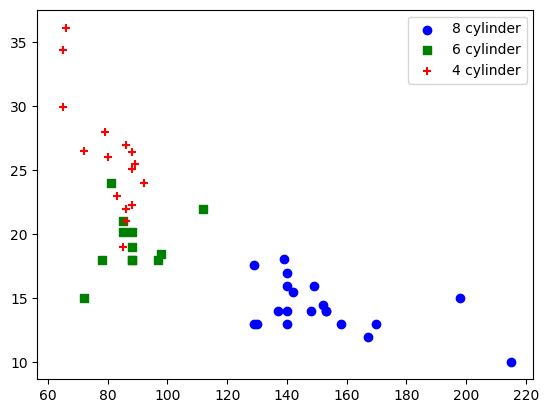

2
2
2


PyObject <matplotlib.legend.Legend object at 0x144e2ca20>

In [62]:
#no 8 continuation
co = ["b","g","r"]
mar = ["o", "s", "+"]
lab_1 = ["8 cylinder", "6 cylinder", "4 cylinder"]
x = 0;
for gb_cylinder in gb_cylinders
    x+=1
   scatter(gb_cylinder[:,:horsepower], gb_cylinder[:,:mpg], c=co[x], marker = mar[x], label = lab_1[x])
   println("2") 
end
legend() 

In [16]:
my_auto_file_1 = joinpath("","ramen-ratings.csv")

"ramen-ratings.csv"

In [17]:
df_1 = CSV.read(my_auto_file_1, copycols = true)
first(df_1, 1)


,review_id,brand,variety,style,country,stars,top_ten
,Int64,String,String,String⍰,String,String,String⍰
1,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,missing


In [18]:
size(df_1)

(2580, 7)

In [19]:
n_row_with_rating = filter(row -> row[:stars] != "Unrated", df_1)

,review_id,brand,variety
,Int64,String,String
1,2580,New Touch,T's Restaurant Tantanmen
2,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles
3,2578,Nissin,Cup Noodles Chicken Vegetable
4,2577,Wei Lih,GGE Ramen Snack Tomato Flavor
5,2576,Ching's Secret,Singapore Curry
6,2575,Samyang Foods,Kimchi song Song Ramen
7,2574,Acecook,Spice Deli Tantan Men With Cilantro
8,2573,Ikeda Shoku,Nabeyaki Kitsune Udon
9,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen


In [20]:
#no 2
no_of_rating = size(n_row_with_rating, 1)
println("The number of ramen with rating is $no_of_rating")

The number of ramen with rating is 2577


In [21]:
# no 3
n_row_with_rating

,review_id,brand,variety
,Int64,String,String
1,2580,New Touch,T's Restaurant Tantanmen
2,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles
3,2578,Nissin,Cup Noodles Chicken Vegetable
4,2577,Wei Lih,GGE Ramen Snack Tomato Flavor
5,2576,Ching's Secret,Singapore Curry
6,2575,Samyang Foods,Kimchi song Song Ramen
7,2574,Acecook,Spice Deli Tantan Men With Cilantro
8,2573,Ikeda Shoku,Nabeyaki Kitsune Udon
9,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen


In [22]:
#no 4: changing the :star from string to float
n_row_with_rating[!, :stars] = parse.(Float64, n_row_with_rating[:, :stars])

2577-element Array{Float64,1}:
 3.75
 1.0 
 2.25
 2.75
 3.75
 4.75
 4.0 
 3.75
 0.25
 2.5 
 5.0 
 5.0 
 4.25
 ⋮   
 2.5 
 2.0 
 1.5 
 2.0 
 3.0 
 1.0 
 2.5 
 3.5 
 1.0 
 2.0 
 2.0 
 0.5 

In [23]:
first(n_row_with_rating,1)

,review_id,brand,variety,style,country,stars,top_ten
,Int64,String,String,String⍰,String,Float64,String⍰
1,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,missing


In [24]:
# no 5 What is the highest rated variety of ramen that satisfies the following attributes
n_row_with_rating_nbp = filter!(row -> row[:brand] == "Nissin" && occursin("Beef", row[:variety])==true && row[:style] == "Pack" ,  n_row_with_rating)


,review_id,brand,variety,style,country
,Int64,String,String,String⍰,String
1,2498,Nissin,Demae Ramen Spicy Beef,Pack,Germany
2,2136,Nissin,Demae Ramen Roast Beef Flavour Instant Noodles,Pack,Hong Kong
3,1546,Nissin,Demae Rice Vermicelli Beef Flavour,Pack,Hong Kong
4,1460,Nissin,Premium Instant Noodles Spicy Beef Flavour,Pack,Singapore
5,1448,Nissin,Premium Instant Noodles Roasted Beef Flavour,Pack,Singapore
6,843,Nissin,Top Ramen Short Cuts Beef,Pack,USA
7,719,Nissin,Spoon-it Beef,Pack,USA
8,703,Nissin,Spoon-it Rich Hearty Beef Stew,Pack,USA
9,351,Nissin,Top Ramen Picante Beef,Pack,USA


In [25]:
#no 5
high_rate = maximum(n_row_with_rating_nbp[:,:stars])
n_row_with_rating_nbp_HV = filter!(row -> row[:stars] == high_rate, n_row_with_rating_nbp)



,review_id,brand,variety,style,country
,Int64,String,String,String⍰,String
1,1448,Nissin,Premium Instant Noodles Roasted Beef Flavour,Pack,Singapore


In [26]:
#no 5 Continuation 
the_variety_wit_hr = n_row_with_rating_nbp_HV[:, :variety]
#println(the_variety_wit_hr)
println("The highest rated variety of ramen that satisfies Nissin brand, beef in variety and pack style is ", the_variety_wit_hr)

The highest rated variety of ramen that satisfies Nissin brand, beef in variety and pack style is ["Premium Instant Noodles Roasted Beef Flavour"]


In [27]:
#no 6 how many countries are unique
unique_country = unique(df_1[:, :country])
numb_country = size(unique_country,1)


37

In [29]:
df_country = by(df_1, :country, total_ramen_rat=:country=>col->length(col))

,country,total_ramen_rat
,String,Int64
1,Japan,352
2,Taiwan,224
3,USA,324
4,India,31
5,South Korea,309
6,Singapore,109
7,Thailand,191
8,Hong Kong,137
9,Vietnam,108


In [32]:
#no 8 sorting the rows in df_by_country
sort!(df_country, :total_ramen_rat, rev=true)

,country,total_ramen_rat
,String,Int64
1,Japan,352
2,USA,324
3,South Korea,309
4,Taiwan,224
5,Thailand,191
6,China,169
7,Malaysia,156
8,Hong Kong,137
9,Indonesia,126


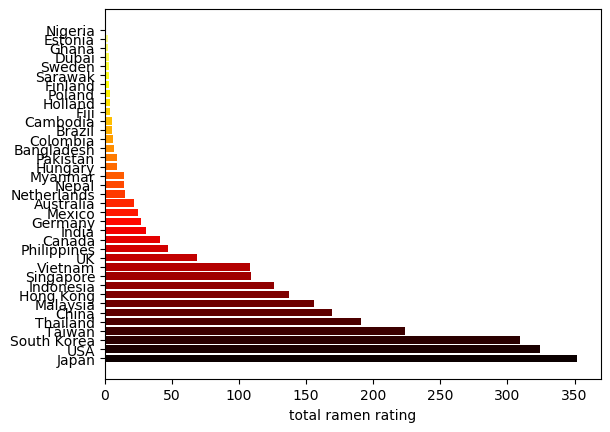

PyObject Text(0.5, 24.0, 'total ramen rating')

In [71]:
bar_labels = df_country[:, :country]
bar_height = df_country[:, :total_ramen_rat]
bar_ids = [i for i = 1:37]
figure()
barh(bar_ids,bar_height,color = auto_color)
yticks(bar_ids, bar_labels)
xlabel("total ramen rating")

In [68]:
#no 10 drop the row that are missing top ten 
df_top_ten = filter(row -> row[:top_ten] !== missing, df_1)
#first(df_top_ten,1)

,review_id,brand,variety
,Int64,String,String
1,1964,MAMA,Instant Noodles Coconut Milk Flavour
2,1947,Prima Taste,Singapore Laksa Wholegrain La Mian
3,1925,Prima,Juzz's Mee Creamy Chicken Flavour
4,1907,Prima Taste,Singapore Curry Wholegrain La Mian
5,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor
6,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle
7,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened Tomato Sauce
8,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste)
9,1585,CarJEN,Nyonya Curry Laksa


In [70]:
#no 11 country from the top ten ramen
top_ten_ramen_country = by(df_top_ten, :country, total_top_ten=:country=>col->length(col))
sort!(top_ten_ramen_country, :total_top_ten, rev=true)

,country,total_top_ten
,String,Int64
1,Singapore,7
2,Japan,6
3,Malaysia,6
4,South Korea,5
5,Indonesia,4
6,Thailand,3
7,Taiwan,2
8,USA,1
9,Hong Kong,1


In [73]:
mat_1 = PyPlot.matplotlib.cm.get_cmap("hot")

In [74]:
auto_color_1 = mat.(range(0.0, stop =0.9, length = 11))

11-element Array{NTuple{4,Float64},1}:
 (0.0416, 0.0, 0.0, 1.0)             
 (0.2783814132520015, 0.0, 0.0, 1.0) 
 (0.5151628265040029, 0.0, 0.0, 1.0) 
 (0.7519442397560044, 0.0, 0.0, 1.0) 
 (0.9887256530080059, 0.0, 0.0, 1.0) 
 (1.0, 0.22549078798923422, 0.0, 1.0)
 (1.0, 0.46225510912956536, 0.0, 1.0)
 (1.0, 0.6990194302698964, 0.0, 1.0) 
 (1.0, 0.9357837514102275, 0.0, 1.0) 
 (1.0, 1.0, 0.258822788234553, 1.0)  
 (1.0, 1.0, 0.6139702022054964, 1.0) 

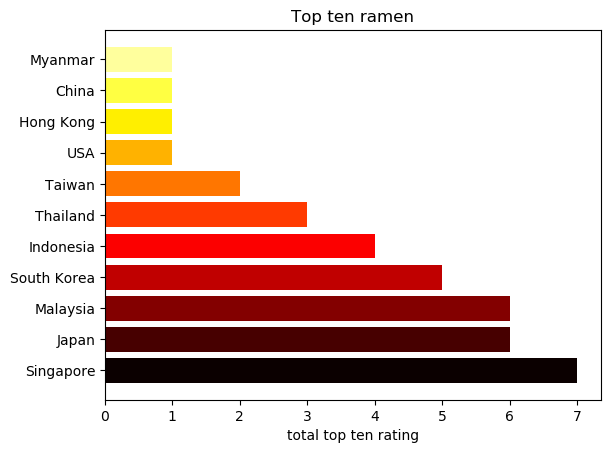

PyObject Text(0.5, 1, 'Top ten ramen')

In [76]:
bar_labels = top_ten_ramen_country[:, :country]
bar_height = top_ten_ramen_country[:, :total_top_ten]
bar_ids = [i for i = 1:11]
figure()
barh(bar_ids,bar_height,color = auto_color_1)
yticks(bar_ids, bar_labels)
xlabel("total top ten rating")
title("Top ten ramen")

In [83]:
#no 12 
top_ten_ramen_country_4 = filter(row -> row[:country] == "Singapore" || row[:country] == "Japan" || row[:country] =="Malaysia" || row[:country] == "South Korea" , df_1)
#first(top_ten_ramen_country_4, 1)

,review_id,brand,variety
,Int64,String,String
1,2580,New Touch,T's Restaurant Tantanmen
2,2575,Samyang Foods,Kimchi song Song Ramen
3,2574,Acecook,Spice Deli Tantan Men With Cilantro
4,2573,Ikeda Shoku,Nabeyaki Kitsune Udon
5,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen
6,2571,KOKA,The Original Spicy Stir-Fried Noodles
7,2568,Nongshim,Mr. Bibim Stir-Fried Kimchi Flavor
8,2567,Nissin,Deka Buto Kimchi Pork Flavor
9,2565,KOKA,Mushroom Flavour Instant Noodles


In [84]:
top_ten_ramen_country_4 = filter!(row -> row[:stars] != "Unrated", top_ten_ramen_country_4)

,review_id,brand,variety
,Int64,String,String
1,2580,New Touch,T's Restaurant Tantanmen
2,2575,Samyang Foods,Kimchi song Song Ramen
3,2574,Acecook,Spice Deli Tantan Men With Cilantro
4,2573,Ikeda Shoku,Nabeyaki Kitsune Udon
5,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen
6,2571,KOKA,The Original Spicy Stir-Fried Noodles
7,2568,Nongshim,Mr. Bibim Stir-Fried Kimchi Flavor
8,2567,Nissin,Deka Buto Kimchi Pork Flavor
9,2565,KOKA,Mushroom Flavour Instant Noodles


In [96]:
top_ten_ramen_country_4[4, :country]

"Japan"

In [98]:
top_ten_ramen_country_4[!, :stars] = parse.(Float64, top_ten_ramen_country_4[:, :stars])

923-element Array{Float64,1}:
 3.75
 4.75
 4.0 
 3.75
 0.25
 2.5 
 4.25
 4.5 
 3.5 
 4.0 
 5.0 
 4.25
 4.75
 ⋮   
 3.75
 4.0 
 3.5 
 4.0 
 3.5 
 3.5 
 2.5 
 3.5 
 5.0 
 2.5 
 2.0 
 2.0 

In [ ]:
figure()
# hist for histogram
hist(df_salaries[:, :salary])
xlabel("9-month salary, \$")
ylabel("# professors")
title("salary of OSU profs")

In [99]:
group_by_country_top_4 = groupby(top_ten_ramen_country_4, :country)

,review_id,brand,variety,style,country
,Int64,String,String,String⍰,String
1,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan
2,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan
3,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan
4,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan
5,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan
6,2553,Nissin,Hakata Ramen Noodle White Tonkotsu,Bowl,Japan
7,2546,New Touch,Sugo-Men Kyoto Backfat Shoyu Ramen,Bowl,Japan
8,2542,Acecook,Super Cup Yochan Ika Yakisoba,Tray,Japan
9,2534,Fujiwara,Hokkaido Hakodate Shoyu Ramen,Pack,Japan


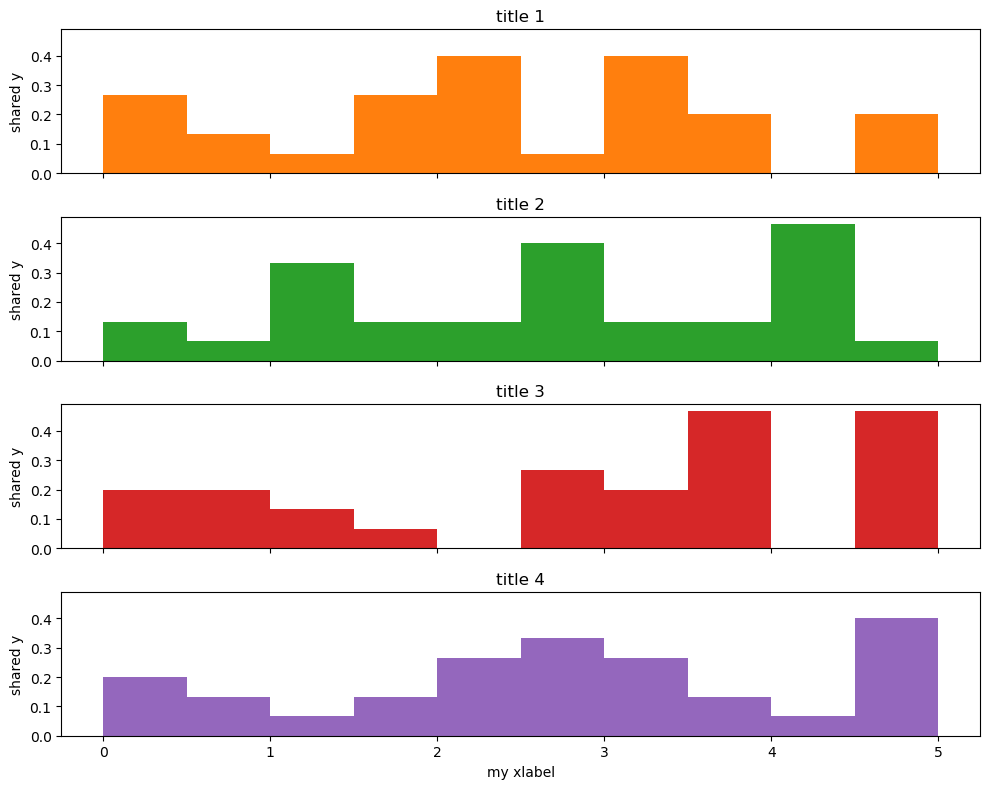

PyObject Text(0.5, 24.0, 'my xlabel')

In [93]:
#
bins = range(0.0, 5.0, length = 11)

fig, axs = subplots(4,1,figsize = (10,8),sharex=true,sharey=true,tight_layout=true)
for i = 1:4
    axs[i].hist(5*rand(30), color = "C$i", bins=bins, normed = true)
    axs[i].set_title("title $i")
    axs[i].set_ylabel("shared y")
end
xlabel("my xlabel")

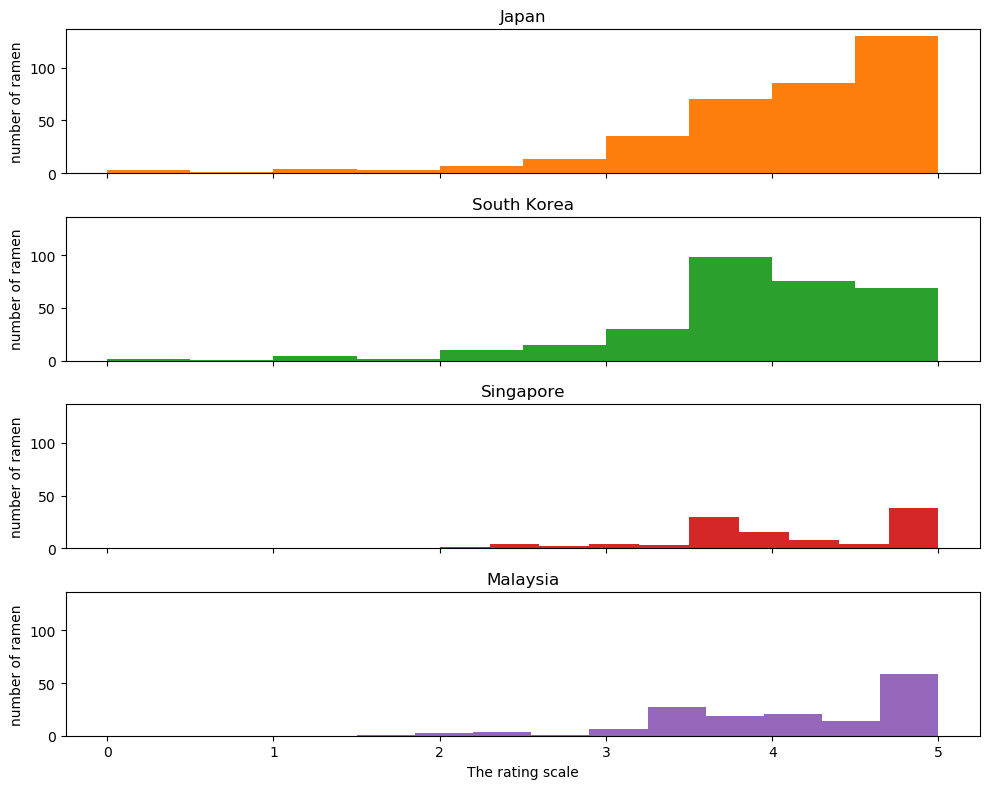

PyObject Text(0.5, 24.0, 'The rating scale')

In [104]:
#no 13 The plotting of the rating scale for the top four countries that make the top ten rating
bins = range(0.0, 5.0, length = 11)

fig, axs = subplots(4,1,figsize = (10,8),sharex=true,sharey=true,tight_layout=true)
i = 0
for gp in group_by_country_top_4
    i+=1
    rating = gp[1, :country]
    axs[i].hist(gp[:,:stars], color = "C$i")#, bins=bins, normed = true)
    axs[i].set_title("$rating")
    axs[i].set_ylabel("number of ramen")
end
xlabel("The rating scale")
